# Triple A - Group Project
## Predictiing Taxis Demand
### Clustering Census Tracts by Demand Patterns
We suspect there to be a lot of common demand patterns between Census Tracts and want to reduce the computational intensity of assigning specific demand to each Tract individually. <br>
In the following chunks we try to consolidate the Census Tracts to find a muchh smaller number of actual demand patterns. For this we first transform the full dataframe and reduce dimensionality following the same logic for time buckets as Census Tracts (not all time buckets are equally important in determining the demand pattern and can most likely be aggregated for using PCA keeping most of the variance while sorting out redundant information from the data)

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [4]:
census_hourly = pd.read_csv('data/census_hourly.csv', parse_dates=['Trip Hour'])
census_hourly = census_hourly[['Trip Hour', 'Tract', 'trip_count']]

,Trip Hour,Tract,trip_count
0,2024-01-01,17031842400,0.000000
1,2024-01-01,17031840300,0.000000
2,2024-01-01,17031841100,0.000000
3,2024-01-01,17031841200,0.090909
4,2024-01-01,17031839000,4.800000
...,...,...,...
8766940,2025-04-01,17031070400,0.000000
8766941,2025-04-01,17031070500,0.000000
8766942,2025-04-01,17031130300,0.000000
8766943,2025-04-01,17031292200,0.000000


In [15]:
full_wide = census_hourly.pivot(index='Tract',
                columns='Trip Hour',
                values='trip_count')

full_wide.shape

(801, 10945)

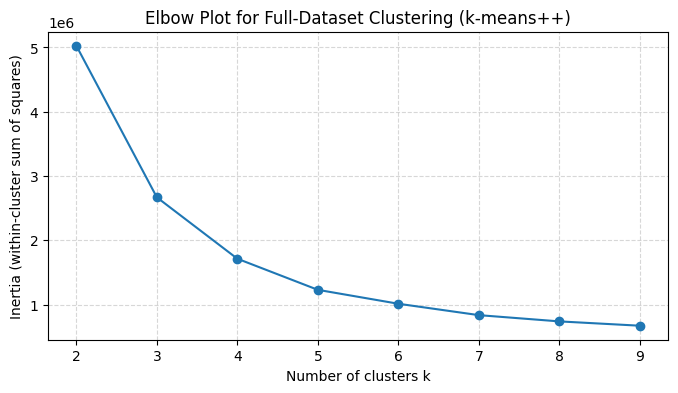

In [31]:
# if we want to cluster the full dataset (we need to fidget around with amount of clusters a bit)
scaler = StandardScaler()
X = scaler.fit_transform(full_wide)

inertias = []
K = range(2, 10) # start 2-50 _ elbow around 2-10 Clusters _ 4-5 Clusters seem optimal
for k in K:
    km = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0
    )
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Plot for Full-Dataset Clustering (k-means++)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

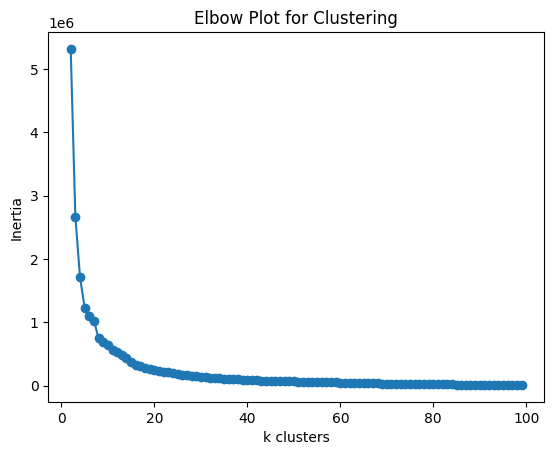

In [26]:
# same with PCA, also need to try around a bit

scaler = StandardScaler()
X = scaler.fit_transform(full_wide)

pca = PCA(n_components=500, svd_solver='full', random_state=0)
X_reduced = pca.fit_transform(X)


df_pca = pd.DataFrame(
    X_reduced,
    index=wide.index,
    columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])]
)


inertias = []
K = range(2, 100)
for k in K:
    km.fit(df_pca)
    inertias.append(km.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Plot for Full-Dataset Clustering (k-means++)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
best_k = 5 
labels = kmeans.fit_predict(df_pca)

tract_clusters = pd.DataFrame({
    'Tract':   df_pca.index.astype(str),
    'Cluster': labels
}).reset_index(drop=True)

tract_clusters.head()

In [ ]:
# tract_clusters.to_csv('data/tract_clusters.csv', index=False)